In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pointbiserialr
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_absolute_percentage_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer,RobustScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold,LeaveOneOut,LeavePOut,validation_curve,learning_curve
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,VotingRegressor,StackingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
# from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge,ARDRegression,Lasso, Ridge

## Cleaning the dataset for Thermal Conductivity 

In [3]:
df_raw=pd.read_excel('Book1-3.xlsx')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ZrB2                  94 non-null     float64
 1   SiC                   94 non-null     float64
 2   TiB2                  94 non-null     int64  
 3   TiSi2                 94 non-null     int64  
 4   ZrC                   94 non-null     float64
 5   ZrSi2                 94 non-null     int64  
 6   MoSi2                 94 non-null     float64
 7   B4C                   94 non-null     float64
 8   Si3N4                 94 non-null     int64  
 9   TaSi2                 94 non-null     int64  
 10  purity                30 non-null     float64
 11  Sinter method         94 non-null     object 
 12  Sinter temp           81 non-null     float64
 13  Relative Density      89 non-null     float64
 14  GS in microns         44 non-null     float64
 15  Temp                  94 

In [4]:
df_raw=df_raw.drop(['purity',"TiB2",'GS in microns'],axis=1)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ZrB2                  94 non-null     float64
 1   SiC                   94 non-null     float64
 2   TiSi2                 94 non-null     int64  
 3   ZrC                   94 non-null     float64
 4   ZrSi2                 94 non-null     int64  
 5   MoSi2                 94 non-null     float64
 6   B4C                   94 non-null     float64
 7   Si3N4                 94 non-null     int64  
 8   TaSi2                 94 non-null     int64  
 9   Sinter method         94 non-null     object 
 10  Sinter temp           81 non-null     float64
 11  Relative Density      89 non-null     float64
 12  Temp                  94 non-null     int64  
 13  Thermal Conductivity  94 non-null     float64
dtypes: float64(8), int64(5), object(1)
memory usage: 10.4+ KB


In [6]:
df_raw=df_raw.drop(['TiSi2'],axis=1)

In [7]:
df_raw['Sinter method'] = df_raw['Sinter method'].replace({
    'HP': 1,
    'SPS': 2,
    'PS': 3
})
print(df_raw)

     ZrB2   SiC   ZrC  ZrSi2  MoSi2  B4C  Si3N4  TaSi2  Sinter method  \
0   100.0   0.0   0.0      0    0.0  0.0      0      0              3   
1   100.0   0.0   0.0      0    0.0  0.0      0      0              1   
2   100.0   0.0   0.0      0    0.0  0.0      0      0              1   
3   100.0   0.0   0.0      0    0.0  0.0      0      0              1   
4   100.0   0.0   0.0      0    0.0  0.0      0      0              1   
..    ...   ...   ...    ...    ...  ...    ...    ...            ...   
89   55.0  15.0  30.0      0    0.0  0.0      0      0              2   
90   74.0  18.0   8.0      0    0.0  0.0      0      0              2   
91   63.0  25.0  12.0      0    0.0  0.0      0      0              2   
92   51.0  33.0  16.0      0    0.0  0.0      0      0              2   
93   61.0   4.0  35.0      0    0.0  0.0      0      0              2   

    Sinter temp  Relative Density  Temp  Thermal Conductivity  
0           NaN              85.0    25                  25

In [8]:
empty=df_raw[df_raw['Sinter temp'].isna()].index
empty=empty.to_numpy()
df_raw=df_raw.drop(empty)
df_raw=df_raw.reset_index(drop=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ZrB2                  81 non-null     float64
 1   SiC                   81 non-null     float64
 2   ZrC                   81 non-null     float64
 3   ZrSi2                 81 non-null     int64  
 4   MoSi2                 81 non-null     float64
 5   B4C                   81 non-null     float64
 6   Si3N4                 81 non-null     int64  
 7   TaSi2                 81 non-null     int64  
 8   Sinter method         81 non-null     int64  
 9   Sinter temp           81 non-null     float64
 10  Relative Density      78 non-null     float64
 11  Temp                  81 non-null     int64  
 12  Thermal Conductivity  81 non-null     float64
dtypes: float64(8), int64(5)
memory usage: 8.4 KB


In [9]:
empty=df_raw[df_raw['Relative Density'].isna()].index
empty=empty.to_numpy()
df_raw=df_raw.drop(empty)
df_raw=df_raw.reset_index(drop=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ZrB2                  78 non-null     float64
 1   SiC                   78 non-null     float64
 2   ZrC                   78 non-null     float64
 3   ZrSi2                 78 non-null     int64  
 4   MoSi2                 78 non-null     float64
 5   B4C                   78 non-null     float64
 6   Si3N4                 78 non-null     int64  
 7   TaSi2                 78 non-null     int64  
 8   Sinter method         78 non-null     int64  
 9   Sinter temp           78 non-null     float64
 10  Relative Density      78 non-null     float64
 11  Temp                  78 non-null     int64  
 12  Thermal Conductivity  78 non-null     float64
dtypes: float64(8), int64(5)
memory usage: 8.1 KB


In [10]:
df_raw=df_raw.drop_duplicates()
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ZrB2                  78 non-null     float64
 1   SiC                   78 non-null     float64
 2   ZrC                   78 non-null     float64
 3   ZrSi2                 78 non-null     int64  
 4   MoSi2                 78 non-null     float64
 5   B4C                   78 non-null     float64
 6   Si3N4                 78 non-null     int64  
 7   TaSi2                 78 non-null     int64  
 8   Sinter method         78 non-null     int64  
 9   Sinter temp           78 non-null     float64
 10  Relative Density      78 non-null     float64
 11  Temp                  78 non-null     int64  
 12  Thermal Conductivity  78 non-null     float64
dtypes: float64(8), int64(5)
memory usage: 8.1 KB


In [11]:
df_raw.to_csv('sample.csv', index=False)

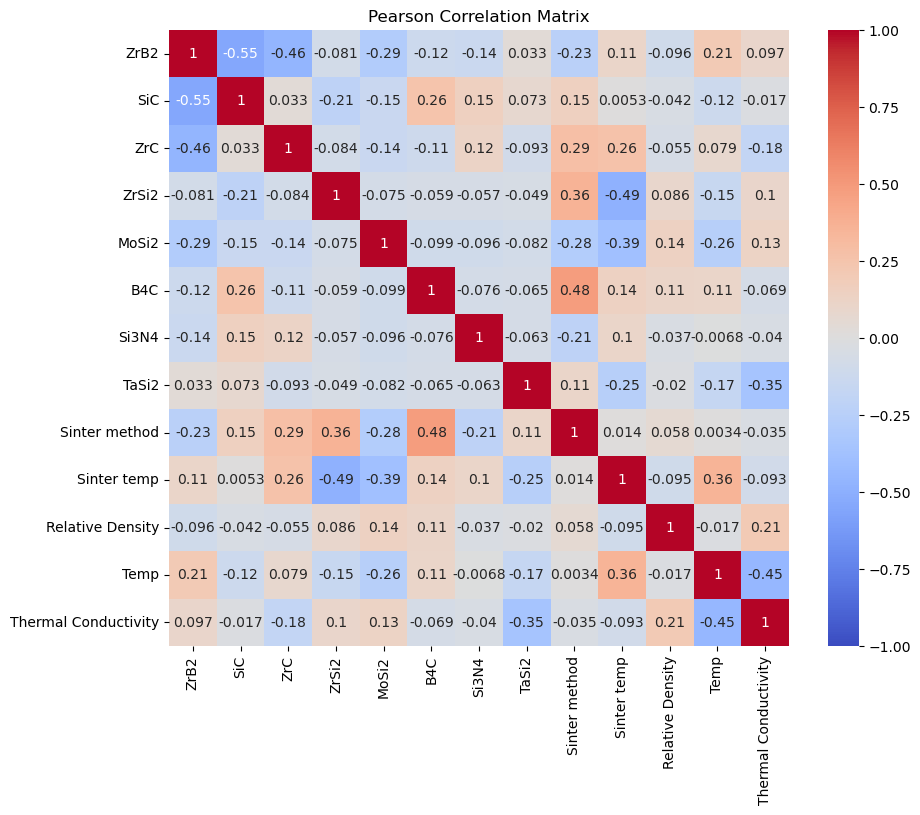

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df_raw.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')
plt.show()
plt.savefig("Pearson_Correlation_Matrix_TC.png", format='png')


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming filtered_df is your DataFrame
x = df_raw[['ZrB2', 'SiC', 'ZrC',
       'ZrSi2', 'MoSi2', 'B4C', 'Si3N4', 'TaSi2', 'Relative Density',
       'Temp']]
y = df_raw[['Thermal Conductivity']]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Predict on the testing data
y_pred = model.predict(x_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 322.79101659862096
R^2 Score: 0.4055304580220246


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming filtered_df is your DataFrame
x = df_raw[['ZrB2', 'SiC', 'ZrC',
       'ZrSi2', 'MoSi2', 'B4C', 'Si3N4', 'TaSi2', 'Relative Density',
       'Temp']]
y = df_raw['Thermal Conductivity']  # Changed to Series

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Predict on the training and testing data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate the Mean Squared Error (MSE) for training and testing data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training Mean Squared Error:", train_mse)
print("Testing Mean Squared Error:", test_mse)

# Calculate the R² score for training and testing data
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)


Training Mean Squared Error: 198.23452332137802
Testing Mean Squared Error: 322.79101659862096
Training R^2 Score: 0.5350035631571946
Testing R^2 Score: 0.4055304580220246


In [15]:
import pandas as pd


conditions = [
    (df_raw['Temp'] <= 100),
    (df_raw['Temp'] > 100) & (df_raw['Temp'] <= 500),
    (df_raw['Temp'] > 500) & (df_raw['Temp'] <= 1000),

    (df_raw['Temp'] > 1000) & (df_raw['Temp'] <= 1500),
    (df_raw['Temp'] > 1500)
]

labels = [0, 1,2, 3, 4]

# Use np.select to assign the labels based on the conditions
df_raw['Label'] = pd.Series(pd.NA, index=df_raw.index)  # Create an empty column 'Label'

df_raw['Label'] = pd.Series(
    pd.NA, dtype=pd.Int64Dtype(), index=df_raw.index
) 


df_raw['Label'] = np.select(conditions, labels, default=df_raw['Label'])

# Show the updated DataFrame
df_raw

,ZrB2,SiC,ZrC,ZrSi2,MoSi2,B4C,Si3N4,TaSi2,Sinter method,Sinter temp,Relative Density,Temp,Thermal Conductivity,Label
0,100.0,0.0,0.0,0,0.0,0.0,0,0,3,2100.0,100.0,2200,55.0,4
1,100.0,0.0,0.0,0,0.0,0.0,0,0,1,2000.0,75.0,2000,43.0,4
2,100.0,0.0,0.0,0,0.0,0.0,0,0,1,1900.0,100.0,1325,67.0,3
3,100.0,0.0,0.0,0,0.0,0.0,0,0,1,1900.0,100.0,25,56.0,0
4,100.0,0.0,0.0,0,0.0,0.0,0,0,2,1900.0,95.6,25,113.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,55.0,15.0,30.0,0,0.0,0.0,0,0,2,1950.0,98.8,25,74.0,0
74,74.0,18.0,8.0,0,0.0,0.0,0,0,2,2000.0,85.7,25,71.0,0
75,63.0,25.0,12.0,0,0.0,0.0,0,0,2,2000.0,85.5,25,71.0,0
76,51.0,33.0,16.0,0,0.0,0.0,0,0,2,2000.0,96.5,25,60.0,0


In [16]:
df_raw.groupby(['Label']).count()

,ZrB2,SiC,ZrC,ZrSi2,MoSi2,B4C,Si3N4,TaSi2,Sinter method,Sinter temp,Relative Density,Temp,Thermal Conductivity
Label,,,,,,,,,,,,,
0,50,50,50,50,50,50,50,50,50,50,50,50,50
3,8,8,8,8,8,8,8,8,8,8,8,8,8
4,20,20,20,20,20,20,20,20,20,20,20,20,20


In [17]:
import pandas as pd

# Assuming df_raw is your DataFrame
desired_label_rows = df_raw[df_raw["Label"] == 2]
print(desired_label_rows)


Empty DataFrame
Columns: [ZrB2, SiC, ZrC, ZrSi2, MoSi2, B4C, Si3N4, TaSi2, Sinter method, Sinter temp, Relative Density, Temp, Thermal Conductivity, Label]
Index: []


In [18]:
# Remove rows with missing 'Label' values
df_raw = df_raw.dropna(subset=['Label'])

# Convert 'Label' column to integers
df_raw['Label'] = df_raw['Label'].astype(int)


## Applying Synthetic Minority Oversampling Technique

In [19]:
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE,SMOTENC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from imblearn.pipeline import Pipeline

smote = SMOTE(random_state=44)
BLS= BorderlineSMOTE(random_state=44, sampling_strategy='all')
adasyn = ADASYN(random_state=44)
logreg = LogisticRegression()
knn = KNeighborsClassifier()
clf = tree.DecisionTreeClassifier()
svc = svm.SVC()
sgd = SGDClassifier()

adasyn_pipe = Pipeline([('sampler', smote), ('classifier', clf)])

params = dict(sampler__k_neighbors=range(2, 6))
adasyn_grid = GridSearchCV(adasyn_pipe, params)


# succeeds
adasyn_grid.fit(df_raw.iloc[:,:-1], df_raw.iloc[:,-1])

GridSearchCV(estimator=Pipeline(steps=[('sampler', SMOTE(random_state=44)),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'sampler__k_neighbors': range(2, 6)})

In [20]:
ada = SMOTE(random_state = 44, k_neighbors = 2)
X_res, y_res = ada.fit_resample(df_raw.iloc[:,:-1], df_raw.iloc[:,-1])

Ada_data = pd.concat([X_res, y_res], axis=1)
Ada_data = Ada_data.drop_duplicates()
Ada_data

,ZrB2,SiC,ZrC,ZrSi2,MoSi2,B4C,Si3N4,TaSi2,Sinter method,Sinter temp,Relative Density,Temp,Thermal Conductivity,Label
0,100.000000,0.000000,0.000000,0,0.0,0.0,0,0,3,2100.000000,100.0,2200,55.000000,4
1,100.000000,0.000000,0.000000,0,0.0,0.0,0,0,1,2000.000000,75.0,2000,43.000000,4
2,100.000000,0.000000,0.000000,0,0.0,0.0,0,0,1,1900.000000,100.0,1325,67.000000,3
3,100.000000,0.000000,0.000000,0,0.0,0.0,0,0,1,1900.000000,100.0,25,56.000000,0
4,100.000000,0.000000,0.000000,0,0.0,0.0,0,0,2,1900.000000,95.6,25,113.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,55.349486,0.000000,44.650514,0,0.0,0.0,0,0,3,2100.000000,100.0,2153,53.360764,4
146,94.408364,5.591636,0.000000,0,0.0,0.0,0,0,1,2000.000000,101.0,2000,81.763345,4
147,95.726261,0.000000,4.273739,0,0.0,0.0,0,0,1,2145.251401,100.0,2104,72.929611,4
148,89.129928,0.000000,10.870072,0,0.0,0.0,0,0,3,2100.000000,100.0,2200,66.467926,4


In [21]:
X1 = Ada_data[['ZrB2', 'SiC', 'ZrC', 'ZrSi2', 'MoSi2', 'B4C', 'Si3N4', 'TaSi2',
       'Sinter method', 'Sinter temp', 'Relative Density',"Temp"]]
Y1 = Ada_data['Thermal Conductivity']

In [22]:
print(Ada_data.columns)

Index(['ZrB2', 'SiC', 'ZrC', 'ZrSi2', 'MoSi2', 'B4C', 'Si3N4', 'TaSi2',
       'Sinter method', 'Sinter temp', 'Relative Density', 'Temp',
       'Thermal Conductivity', 'Label'],
      dtype='object')


In [23]:
df_raw=Ada_data
df_raw=df_raw.drop(['Label'],axis=1)
train_dataset = df_raw.sample(frac=0.8, random_state=44)
test_dataset = df_raw.drop(train_dataset.index)
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 147
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ZrB2                  30 non-null     float64
 1   SiC                   30 non-null     float64
 2   ZrC                   30 non-null     float64
 3   ZrSi2                 30 non-null     int64  
 4   MoSi2                 30 non-null     float64
 5   B4C                   30 non-null     float64
 6   Si3N4                 30 non-null     int64  
 7   TaSi2                 30 non-null     int64  
 8   Sinter method         30 non-null     int64  
 9   Sinter temp           30 non-null     float64
 10  Relative Density      30 non-null     float64
 11  Temp                  30 non-null     int64  
 12  Thermal Conductivity  30 non-null     float64
dtypes: float64(8), int64(5)
memory usage: 3.3 KB


In [24]:
y_train = train_dataset.pop('Thermal Conductivity') #y_train
y_test = test_dataset.pop('Thermal Conductivity')   # y_test

## Trying ML different models

In [25]:
from sklearn.impute import SimpleImputer,KNNImputer

imptrain = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imptest = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

Train_scaler = MinMaxScaler()
Test_scaler = MinMaxScaler()


X_train_scaled = Train_scaler.fit_transform(train_dataset)
X_test_scaled = Test_scaler.fit_transform(test_dataset)

imptrain.fit(X_train_scaled)
imptest.fit(X_test_scaled)

X_train_scaled = imptrain.transform(X_train_scaled)
X_test_scaled = imptest.transform(X_test_scaled)

In [26]:
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    """Apply selected regression model to data and measure error"""
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Predict on the testing set
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    if verbose:
        
        #print("Train MAE = {:.4f} in {}".format(train_mae, model_name))
        # print("Train R^2 = {:.4f} in {}".format(train_r2, model_name))
        #print("Test MAE = {:.4f} in {}".format(test_mae, model_name))
        print(".".format(test_r2, model_name))
        
    return model, y_test_pred, train_mae, train_r2, test_mae, test_r2

# Assuming you have a dictionary of regression models
regression_models = {
    "DecisionTree": DecisionTreeRegressor(random_state=44),
    "SVR": SVR(),
    "RandomForest": RandomForestRegressor(random_state=44),
    "XGBoost": XGBRegressor(random_state=44),
    "KRR": KernelRidge(),
    "ABR": AdaBoostRegressor(random_state=44),
    "GBR": GradientBoostingRegressor(random_state=44),
    "ETR": ExtraTreesRegressor(random_state=44),
    "KNN": KNeighborsRegressor()
}

# Iterate over the dictionary of models
for model_name, model in regression_models.items():
    _, y_test_pred, train_mae, train_r2, test_mae, test_r2 = make_regression(X_train_scaled, y_train, X_test_scaled, y_test, model, model_name, verbose=True)
    print("R2 of", model_name, "=", test_r2)
    print("MAE of", model_name, "=", test_mae)
    print("Train MAE of", model_name, "=", train_mae)
    print("Train R2 of", model_name, "=", train_r2)


.
R2 of DecisionTree = 0.3499185654024458
MAE of DecisionTree = 9.24007867729185
Train MAE of DecisionTree = 0.8333333333333334
Train R2 of DecisionTree = 0.949420796394662
.
R2 of SVR = 0.12662538462346584
MAE of SVR = 13.07888141123097
Train MAE of SVR = 11.414464872896822
Train R2 of SVR = 0.18286396026345708
.
R2 of RandomForest = 0.6728771891987974
MAE of RandomForest = 7.82682293835684
Train MAE of RandomForest = 3.3812802884640325
Train R2 of RandomForest = 0.8883245624198357
.
R2 of XGBoost = 0.7691374617678814
MAE of XGBoost = 6.566251987119356
Train MAE of XGBoost = 0.8438270690595372
Train R2 of XGBoost = 0.9494199111072851
.
R2 of KRR = 0.3607990170819845
MAE of KRR = 11.124886294813454
Train MAE of KRR = 8.74013482618629
Train R2 of KRR = 0.5133281863497943
.
R2 of ABR = 0.5927242808209616
MAE of ABR = 8.19571999842775
Train MAE of ABR = 7.462149386533747
Train R2 of ABR = 0.7237277692456707
.
R2 of GBR = 0.6964558926038683
MAE of GBR = 7.276048081141896
Train MAE of GBR =

In [27]:
def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    model.fit(X_train,y_train)
    y_predict=model.predict(X_train)
    train_error = mean_absolute_error(y_train, y_predict)
    y_predict=model.predict(X_test)
    test_error = mean_absolute_error(y_test, y_predict)
    
    if verbose:
        print("Train error = "'{}'.format(train_error)+" in " + model_name)
        print("Test error = "'{}'.format(test_error)+" in " + model_name)
    trained_model = model
    
    return trained_model, y_predict, train_error, test_error

In [28]:
regression_models = {
    "DecisionTree" : DecisionTreeRegressor(random_state=44),
    "SVR": SVR(),
    "RandomForest" : RandomForestRegressor(random_state=44),
    "XGBoost": XGBRegressor(random_state=44),
    "KRR":KernelRidge(),
    "ABR": AdaBoostRegressor(random_state=44),
    "GBR": GradientBoostingRegressor(random_state=44),
    "ETR": ExtraTreesRegressor(random_state=44),
    "KNN":KNeighborsRegressor()
}
for model_name in regression_models.keys():
    _, y_predict, _, _= make_regression(X_train_scaled, y_train, X_test_scaled, y_test,regression_models[model_name], model_name, verbose=True)
    print("R2 of",model_name,"=", r2_score(y_test,y_predict),"\n"),
    print("MAE of",model_name,"=", mean_absolute_error(y_test,y_predict),"\n")

Train error = 0.8333333333333334 in DecisionTree
Test error = 9.24007867729185 in DecisionTree
R2 of DecisionTree = 0.3499185654024458 

MAE of DecisionTree = 9.24007867729185 

Train error = 11.414464872896822 in SVR
Test error = 13.07888141123097 in SVR
R2 of SVR = 0.12662538462346584 

MAE of SVR = 13.07888141123097 

Train error = 3.3812802884640325 in RandomForest
Test error = 7.82682293835684 in RandomForest
R2 of RandomForest = 0.6728771891987974 

MAE of RandomForest = 7.82682293835684 

Train error = 0.8438270690595372 in XGBoost
Test error = 6.566251987119356 in XGBoost
R2 of XGBoost = 0.7691374617678814 

MAE of XGBoost = 6.566251987119356 

Train error = 8.74013482618629 in KRR
Test error = 11.124886294813454 in KRR
R2 of KRR = 0.3607990170819845 

MAE of KRR = 11.124886294813454 

Train error = 7.462149386533747 in ABR
Test error = 8.19571999842775 in ABR
R2 of ABR = 0.5927242808209616 

MAE of ABR = 8.19571999842775 

Train error = 3.1340988420982816 in GBR
Test error = 7

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Initialize the Extra Trees Regressor
extra_trees = ExtraTreesRegressor(random_state=42)

# Train the model
extra_trees.fit(X_train, y_train)

# Predict on the test set
y_pred = extra_trees.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 113.20742903401522
R^2 Score: 0.7606369469613115


## Final model for Thermal conductivity

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Initialize the Extra Trees Regressor
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Train the model
extra_trees.fit(X_train, y_train)

# Predict on the test set
y_pred_test = extra_trees.predict(X_test)
y_pred_train = extra_trees.predict(X_train)

# Calculate Mean Squared Error for testing set
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (Test):", mse_test)

# Calculate Mean Absolute Error for testing set
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (Test):", mae_test)

# Calculate R² score for testing set
r2_test = r2_score(y_test, y_pred_test)
print("R² Score (Test):", r2_test)

# Calculate Mean Absolute Error for training set
mae_train = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error (Train):", mae_train)

# Calculate R² score for training set
r2_train = r2_score(y_train, y_pred_train)
print("R² Score (Train):", r2_train)


Mean Squared Error (Test): 113.20742903401522
Mean Absolute Error (Test): 6.5713576758962295
R² Score (Test): 0.7606369469613115
Mean Absolute Error (Train): 0.6956666666667102
R² Score (Train): 0.9489418345572966


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mean Squared Error: 180.14481030052985
R^2 Score (Test): 0.6191061651117082
R^2 Score (Train): 0.8286530119258002
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


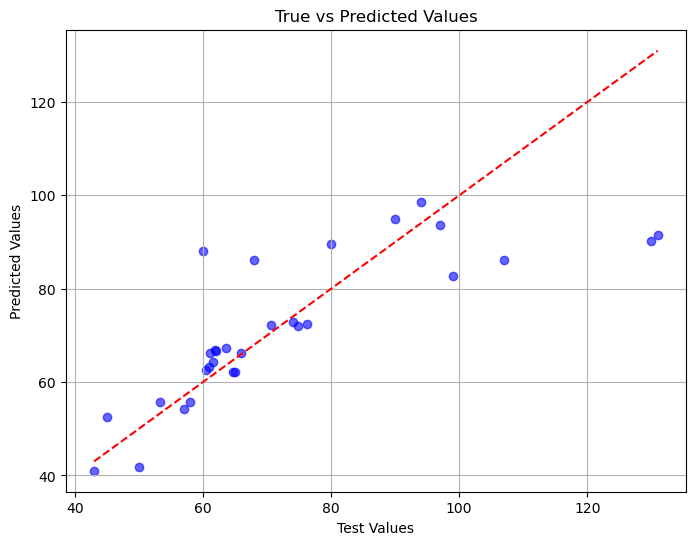

<Figure size 640x480 with 0 Axes>

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming X1 and Y1 are your features and target variable respectively

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Initialize the Extra Trees Regressor
extra_trees = ExtraTreesRegressor(random_state=42)

# Define hyperparameters grid for Extra Trees Regressor
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=extra_trees, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2_test = r2_score(y_test, y_pred)
print("R^2 Score (Test):", r2_test)

# Evaluate the model on the training set
r2_train = best_model.score(X_train, y_train)
print("R^2 Score (Train):", r2_train)
print("Best Hyperparameters:", grid_search.best_params_)
# Plotting true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.title('True vs Predicted Values')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.grid(True)
plt.show()
plt.savefig("True_vs_Predicted_Values_Thermal_Conductivity.png", format='png')


In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the KFold cross-validation splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store the evaluation metrics for each fold
mse_scores = []
mae_scores = []
r2_scores = []

# Iterate over each fold
for fold_idx, (train_index, val_index) in enumerate(kf.split(X1)):
    print(f"Fold {fold_idx + 1}/{num_folds}")
    
    # Split data into training and validation sets for this fold
    X_train, X_val = X1.iloc[train_index], X1.iloc[val_index]
    y_train, y_val = Y1.iloc[train_index], Y1.iloc[val_index]
   
    # Make predictions on the validation set
    y_pred = best_model.predict(X_val)
    
    # Calculate evaluation metrics for this fold
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    # Append scores to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    
    # Print evaluation metrics for this fold
    print(f"  Validation R^2: {r2:.4f}")
    print(f"  Validation MSE: {mse:.4f}")
    print(f"  Validation MAE: {mae:.4f}")

# Calculate the average scores across all folds
average_mse = np.mean(mse_scores)
average_mae = np.mean(mae_scores)
average_r2 = np.mean(r2_scores)

print(f"\nAverage Validation MSE: {average_mse:.4f}")
print(f"Average Validation MAE: {average_mae:.4f}")
print(f"Average Validation R^2: {average_r2:.4f}")


Fold 1/5
  Validation R^2: 0.6191
  Validation MSE: 180.1448
  Validation MAE: 8.3850
Fold 2/5
  Validation R^2: 0.8998
  Validation MSE: 37.9411
  Validation MAE: 3.7329
Fold 3/5
  Validation R^2: 0.6978
  Validation MSE: 57.5616
  Validation MAE: 4.6866
Fold 4/5
  Validation R^2: 0.7744
  Validation MSE: 54.1303
  Validation MAE: 4.4587
Fold 5/5
  Validation R^2: 0.8539
  Validation MSE: 53.1332
  Validation MAE: 3.2405

Average Validation MSE: 76.5822
Average Validation MAE: 4.9007
Average Validation R^2: 0.7690


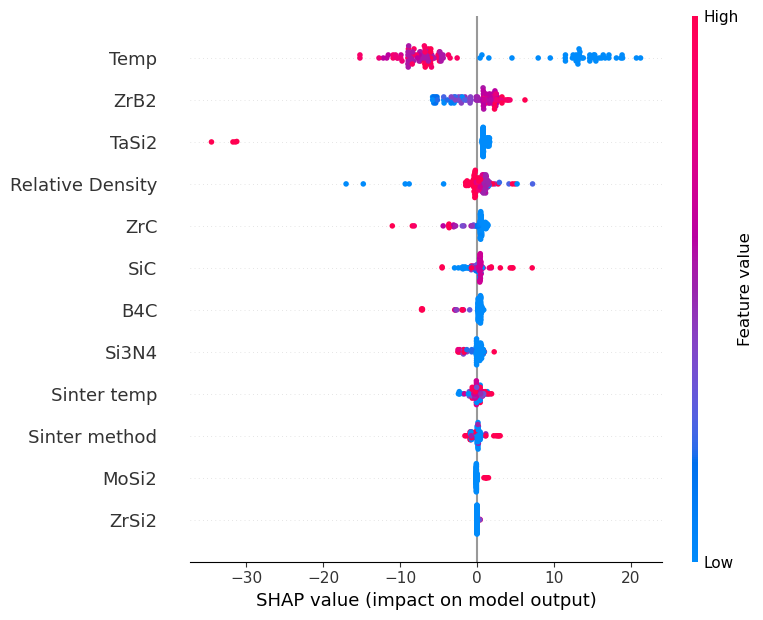

In [33]:
import shap
explainer = shap.Explainer(best_model, X_train)

# Calculate SHAP values
shap_values = explainer(X_train)

# Summary plot (global interpretation)
shap.summary_plot(shap_values, X_train)

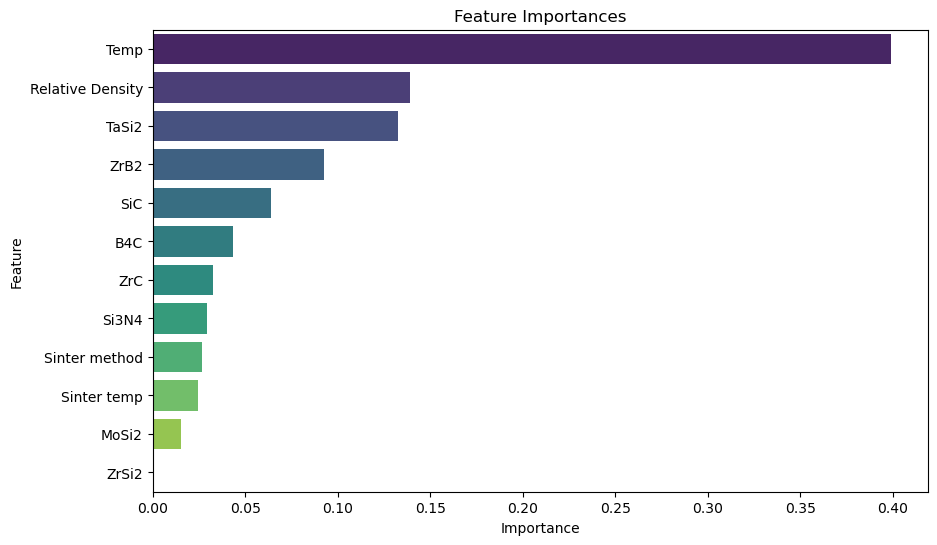

<Figure size 640x480 with 0 Axes>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X1 is your dataset and best_model is your trained model
importances = best_model.feature_importances_
features = pd.DataFrame({'Feature': X1.columns, 'Importance': importances})

# Sort features by importance
features = features.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features, orient='h', palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
plt.savefig("Feature_Importances_TC.png", format='png')


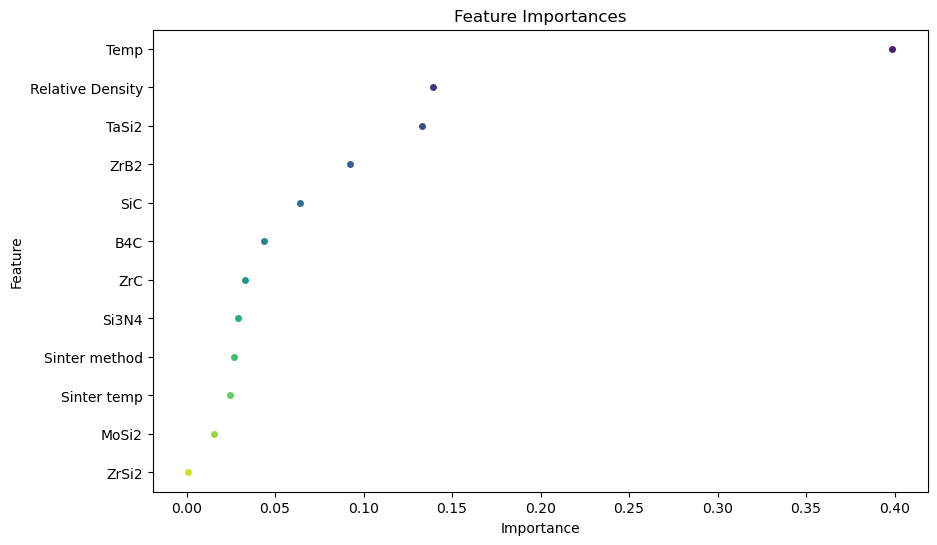

<Figure size 640x480 with 0 Axes>

In [35]:
importances = best_model.feature_importances_
features = pd.DataFrame({'Feature': X1.columns, 'Importance': importances})

# Sort features by importance
features = features.sort_values(by='Importance', ascending=False)

# Plotting feature importances using a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Importance', y='Feature', data=features, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
plt.savefig("Swarn_Plot_TC.png", format='png')


In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the KFold cross-validation splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store the evaluation metrics for each fold
mse_scores = []
train_r2_scores = []
val_r2_scores = []

# Iterate over each fold
for fold_idx, (train_index, val_index) in enumerate(kf.split(X1)):
    print(f"Fold {fold_idx + 1}/{num_folds}")
    
    # Split data into training and validation sets for this fold
    X_train, X_val = X1.iloc[train_index], X1.iloc[val_index]
    y_train, y_val = Y1.iloc[train_index], Y1.iloc[val_index]
    
    # Fit the model to the training data
    best_model.fit(X_train, y_train)

    
    # Calculate R² score for training data
    y_pred_train = best_model.predict(X_train)
    train_r2 = r2_score(y_train, y_pred_train)
    
    train_r2_scores.append(train_r2)
   
    
    print(f"  Training R^2: {train_r2:.4f}")
    



# Calculate the average R² score across all folds for training and validation data
average_train_r2 = np.mean(train_r2_scores)
print(f"\nAverage Training R²: {average_train_r2:.4f}")



Fold 1/5
  Training R^2: 0.8287
Fold 2/5
  Training R^2: 0.8806
Fold 3/5
  Training R^2: 0.9030
Fold 4/5
  Training R^2: 0.8763
Fold 5/5
  Training R^2: 0.8404

Average Training R²: 0.8658


## Applying Model trained for thermal conductivity on cleaned oxide scale thickness dataset

In [37]:
dataframe=pd.read_csv('thermal_conductivity_vs_SiC_concentration_multiple_2.csv')
print(dataframe.columns)

Index(['ZrB2', 'HfB2', 'SiC', 'TaB2', 'Ta', 'C', 'ZrC', 'ZrSi2', 'MoSi2',
       'B4C', 'Si3N4', 'TaSi2', 'WC', 'WB', 'MoSi', 'HfC', 'BN', 'TaC',
       'Ta5Si3', 'LaB6', 'HfSi2', 'ZrO2', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',
       'Temp', 'Oxidation Test', 'Time@Temp (min)', 'Label'],
      dtype='object')


In [38]:
dataframe

,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,ZrO2,Sinter method,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Label
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1900.0,1,60.0,4
1,97.5,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1900.0,1,60.0,4
2,95.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1900.0,1,60.0,4
3,92.5,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1900.0,1,60.0,4
4,90.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1900.0,1,60.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1100.0,1,60.0,4
81,67.5,0.0,32.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1100.0,1,60.0,4
82,65.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1100.0,1,60.0,4
83,60.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1100.0,1,60.0,4


In [39]:
X_testing = dataframe[['ZrB2', 'SiC', 'ZrC', 'ZrSi2', 'MoSi2', 'B4C', 'Si3N4', 'TaSi2',
       'Sinter method', 'Sinter temp', 'Relative Density', 'Temp']]

In [40]:
y_prediction = best_model.predict(X_testing)
dataframe["Thermal Conductivity"] = y_prediction
dataframe.to_csv('thermal_conductivity_vs_SiC_concentration.csv', index=False)

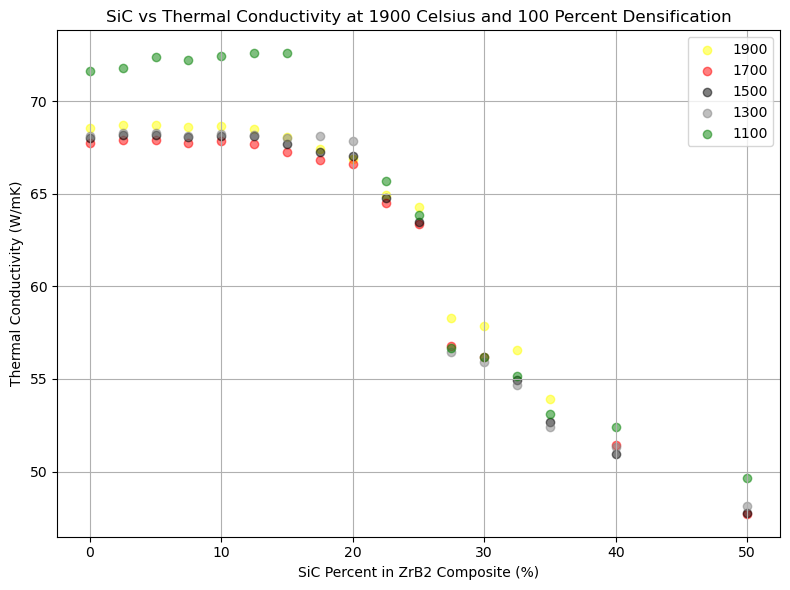

In [41]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(8, 6))

# Scatter plot for the first segment (0-14)
plt.scatter(dataframe['SiC'][0:15], dataframe['Thermal Conductivity'][0:15], color='yellow', alpha=0.5, label='1900')  

# Scatter plot for the second segment (15-29)
plt.scatter(dataframe['SiC'][15:30], dataframe['Thermal Conductivity'][15:30], color='red', alpha=0.5, label='1700')

# Scatter plot for the third segment (30-44)
plt.scatter(dataframe['SiC'][30:45], dataframe['Thermal Conductivity'][30:45], color='black', alpha=0.5, label='1500')

# Scatter plot for the fourth segment (45-59)
plt.scatter(dataframe['SiC'][45:60], dataframe['Thermal Conductivity'][45:60], color='grey', alpha=0.5, label='1300')
plt.scatter(dataframe['SiC'][60:75], dataframe['Thermal Conductivity'][60:75], color='green', alpha=0.5, label='1100')

# Add title and labels
plt.title('SiC vs Thermal Conductivity at 1900 Celsius and 100 Percent Densification')  
plt.xlabel('SiC Percent in ZrB2 Composite (%)') 
plt.ylabel('Thermal Conductivity (W/mK)')  

# Add grid
plt.grid(True) 

# Add legend to distinguish the segments
plt.legend()

# Adjust layout
plt.tight_layout()  

# Save the plot
plt.savefig('SiC_conc_vs_Thermal_Conductivity.png')

# Show the plot
plt.show()


In [42]:
Dataframe=pd.read_csv('oxide_scale_thickness_vs_temp-2.csv')
print(Dataframe.columns)

Index(['ZrB2', 'HfB2', 'SiC', 'TaB2', 'Ta', 'C', 'ZrC', 'ZrSi2', 'MoSi2',
       'B4C', 'Si3N4', 'TaSi2', 'WC', 'WB', 'MoSi', 'HfC', 'BN', 'TaC',
       'Ta5Si3', 'LaB6', 'HfSi2', 'ZrO2', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',
       'Temp', 'Oxidation Test', 'Time@Temp (min)', 'Label'],
      dtype='object')


In [43]:
Dataframe

,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,ZrO2,Sinter method,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Label
0,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1900.0,1,60.0,4
1,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1800.0,1,60.0,4
2,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1700.0,1,60.0,4
3,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1600.0,1,60.0,4
4,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1500.0,1,60.0,4
5,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1400.0,1,60.0,4
6,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1300.0,1,60.0,4
7,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1200.0,1,60.0,4
8,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1100.0,1,60.0,4
9,75.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1900.0,1,60.0,4


In [44]:
X_testin = Dataframe[['ZrB2', 'SiC', 'ZrC', 'ZrSi2', 'MoSi2', 'B4C', 'Si3N4', 'TaSi2',
       'Sinter method', 'Sinter temp', 'Relative Density', 'Temp']]

In [45]:
y_predictio = best_model.predict(X_testin)


In [46]:
Dataframe["Thermal Conductivity"] = y_predictio
Dataframe
Dataframe.to_csv('temp_vs_oxide_thickness.csv', index=False)

In [47]:
Dataframe

,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,Sinter method,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Label,Thermal Conductivity
0,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2000.0,30,60,100.0,1900.0,1,60.0,4,66.875836
1,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2000.0,30,60,100.0,1800.0,1,60.0,4,66.314624
2,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2000.0,30,60,100.0,1700.0,1,60.0,4,66.622246
3,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2000.0,30,60,100.0,1600.0,1,60.0,4,66.970240
4,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2000.0,30,60,100.0,1500.0,1,60.0,4,67.048969
5,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2000.0,30,60,100.0,1400.0,1,60.0,4,66.943979
6,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2000.0,30,60,100.0,1300.0,1,60.0,4,67.882331
7,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2000.0,30,60,100.0,1200.0,1,60.0,4,71.138951
8,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2000.0,30,60,100.0,1100.0,1,60.0,4,72.670535
9,75.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2000.0,30,60,100.0,1900.0,1,60.0,4,64.279137
